In [ ]:
%pip install -i https://test.pypi.org/simple/ VASA==0.0.4

In [1]:
import os
import sys
import geopandas as gpd
import pandas as pd
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.pardir)))
from VASA import VASA

/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# CBG Map of California
counties_map = gpd.GeoDataFrame \
    .from_features(gpd.read_file("../data/ca_cbg")) \
    .set_crs(epsg=4326) \
    .to_crs("+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs")

counties_map = counties_map[counties_map.ALAND > 0]

In [3]:
#Lake Fire 2019 Data
fire2019 = pd.read_csv("../data/lakefire2019_data.csv")
fire2019.origin_census_block_group = "0" + fire2019.origin_census_block_group.astype(str)

In [4]:
fire2019.head()

,Unnamed: 0,origin_census_block_group,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,...,destination_cbgs,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home,mean_home_dwell_time,mean_non_home_dwell_time,mean_distance_traveled_from_home
0,1,060372713005,2019-07-15 07:00:00,2019-07-16 07:00:00,29,742,"{""0"":10,""2001-8000"":6,""1-1000"":6,""1001-2000"":3...","{""1001-2000"":11,""2001-8000"":229,""8001-16000"":4...",5,689,...,"{""060372717023"":1,""060372716004"":1,""0603770150...",1,92,62,"{""21-45"":2,""481-540"":2,""541-600"":3,""721-840"":1...",93,"{""0-25"":1,""76-100"":16,""51-75"":4,""26-50"":2}",710,260,1219
1,2,060372766041,2019-07-15 07:00:00,2019-07-16 07:00:00,136,1799,"{""16001-50000"":12,""0"":42,"">50000"":9,""2001-8000...","{""16001-50000"":167,"">50000"":91,""<1000"":52,""200...",40,798,...,"{""060376509014"":1,""060377019022"":1,""0603727700...",1,125,336,"{""21-45"":8,""481-540"":1,""541-600"":4,""46-60"":1,""...",79,"{""0-25"":22,""76-100"":76,""51-75"":34,""26-50"":3}",749,245,12408
2,3,060374334012,2019-07-15 07:00:00,2019-07-16 07:00:00,35,1884,"{""16001-50000"":1,""0"":10,""2001-8000"":7,""1-1000""...","{""16001-50000"":7,""<1000"":30,""2001-8000"":29,""10...",13,866,...,"{""060374084023"":1,""060374334012"":32,""060374326...",1,54,105,"{""21-45"":4,""481-540"":2,""541-600"":1,""<20"":9,""61...",96,"{""0-25"":3,""76-100"":24,""51-75"":7,""26-50"":1}",855,203,3854
3,4,060375017003,2019-07-15 07:00:00,2019-07-16 07:00:00,45,2334,"{""16001-50000"":10,""0"":11,"">50000"":1,""2001-8000...","{""16001-50000"":214,"">50000"":18,""<1000"":20,""200...",11,724,...,"{""060375023014"":1,""060374084023"":1,""0603750290...",1,142,95,"{""21-45"":1,""481-540"":6,""541-600"":1,""46-60"":1,""...",80,"{""0-25"":5,""76-100"":22,""51-75"":16,""26-50"":2}",727,276,6739
4,5,060375322002,2019-07-15 07:00:00,2019-07-16 07:00:00,94,2791,"{""16001-50000"":9,""0"":44,"">50000"":2,""2001-8000""...","{""16001-50000"":85,"">50000"":109,""<1000"":378,""20...",44,553,...,"{""060375300042"":1,""060375007004"":2,""0603720371...",5,22,266,"{""21-45"":5,""481-540"":2,""541-600"":4,""721-840"":1...",97,"{""0-25"":15,""76-100"":57,""51-75"":14,""26-50"":8}",628,213,4584


In [4]:
# unique_tracts = np.unique([g[:8] for g in fire2019.origin_census_block_group])
# tract_map = counties_map[[(cbg[:8] in unique_tracts) for cbg in counties_map.GEOID]]

In [5]:
v = VASA(
    df=fire2019[["origin_census_block_group", "date_range_start", "distance_traveled_from_home", "median_percentage_time_home"]],
    gdf=counties_map,
    group_summary=lambda g: g[:5], # county level
    df_group_col="origin_census_block_group",
    gdf_group_col="GEOID",
    date_col="date_range_start",
    temp_res="week",
    date_format="%Y-%m-%d %H:%M:%S"
)

In [6]:
del fire2019

In [7]:
v.filter_group()

In [8]:
v.group()

In [9]:
v.fill_missing()

In [10]:
v.lisa(k=2, type="union")

/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 66 disconnected components.
  warnings.warn(message)
/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 4 islands with ids: 1796, 5276, 5962, 9872.
  warnings.warn(message)
/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/esda/moran.py:1054: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/esda/moran.py:1054: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/esda/moran.py:1054: RuntimeWarning: invalid value e

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import mode
import math
from typing import List

from VASA.vasa import VASA
from VASA.BasePlot import BasePlot


class Scatter(BasePlot):

    def __init__(self, v: VASA, cols=None):
        super().__init__("scatter", "scatter_test")

        self.v: VASA = v
        self.plotted = False
        self.fontsize = 14

    # plot args for like colors??
    # showLines: bool or List[int] # fips
    def plot(self, highlight: str = "", titles: str or List[str] = None, figsize=(0, 0)):
        n_cols = math.ceil(len(self.v.cols) / 2)
        n_rows = min(len(self.v.cols), 2)

        fig, axes = plt.subplots(
            n_cols,
            n_rows,
            figsize=((n_rows * 4, n_cols * 4)
                     if figsize[0] * figsize[1] <= 0 else figsize),
            sharex=True,
            sharey=True
        )
        self.fig = fig
        self.axes = [axes] if len(self.v.cols) == 1 else axes.flatten()

        count = self.v.reduce("count")
        recent = self.v.reduce('recency')

        titles = [titles] if titles != None and isinstance(
            titles, str) else titles

        df = count.merge(
            recent,
            left_on="fips",
            right_on="fips",
            how="inner",
            suffixes=("_count", "_recency")
        ).reset_index()

        if df.shape[0] == 0:
            return

        if highlight != "":
            df = df[[
                self.v.group_summary(c) == highlight for c in df.fips.values
            ]].reset_index()

        for i, ax in enumerate(self.axes):
            col: str = self.v.cols[i]
            title = titles[i] if titles and len(titles) >= i + 1 else col

            points = df[[f"{col}_count", f"{col}_recency"]].copy()
            points["count"] = [
                max(c)
                for c in points[f"{col}_count"]
            ]
            points["which"] = [
                (1 if h > c else (np.nan if h == 0 and c == 0 else 0))
                for h, c in points[f"{col}_count"]
            ]
            points = points.rename(
                {f"{col}_recency": "recent"},
                axis="columns"
            )

            points = points[["recent", "count", "which"]].dropna().groupby(
                ["count", "recent"]).agg(np.mean).reset_index()

            if highlight != "":
                self.__draw_lines(highlight, col, ax,
                                  df[[f"{col}_count", "fips"]], f"{col}_count")

            self.__create_scatter(ax, points, zorder=10)
            self.__axis_format(ax)

            ax.set_title(title)

        self.plotted = True
        # return self.fig

    def __draw_lines(self, highlight, col, ax, df, c):

        df = df[[self.v.group_summary(f) == highlight for f in df.fips]]

        to_select = [self.v.group_summary(
            f) == highlight for f in self.v.fips_order]
        lines = np.array(self.v.df[col].tolist())[:, to_select]

        # color = mode(lines).mode[0]
        color = [(1 if a > b else 2) for a, b in df[c]]

        # print(df[c])
        # uzip_a, uzip_b = list(zip(*df[c]))
        # uzip = np.array([*uzip_a, *uzip_b])

        # mm = [np.min(uzip[uzip != 0]), np.max(uzip)]
        # mm = [-1000000, np.max(uzip)]

        # mm = [min(np.min(np.array(df[c]))), max(np.max(np.array(df[c])))]
        # print(mm)

        for i, val in enumerate(color):
            if val == 0:
                continue

            # color = "#d3d3d3"

            # count = np.sum(lines[:, i] == val)
            # alpha = 0.05
            alpha = 1

            # if count == mm[0] or count == mm[1]:
            # print(count, mm)
            # if val == 1:
            #     color = "red"
            # else:
            #     color = "blue"
            # alpha = 1
            # print("HERE")
            color = "red" if val == 1 else "blue"
            self.__draw_line(ax, lines[:, i], val, color, alpha)

    def __draw_line(self, ax, xs, val, color, alpha):
        sig_vals = (xs == val) + 0
        sig_idcs = np.where(sig_vals == 1)[0]

        if len(sig_idcs) == 0:
            return

        start = max(sig_idcs[0] - 1, 0) if len(sig_idcs) > 0 else 0
        stop = sig_idcs[-1] + 1

        # stop line at list sig value
        xs = xs[start:stop]

        ax.plot(
            np.arange(start + 1, stop + 1),
            # + np.random.normal(0, 1/16, size=len(xs)),
            np.cumsum(xs == val),
            c=color,
            alpha=alpha
        )

    def __create_scatter(self, ax, df: pd.DataFrame, **kwargs):
        sns.scatterplot(
            x="recent",
            y="count",
            data=df,
            hue="which",
            palette="bwr",
            ax=ax,
            s=30,
            **kwargs
        )

    def __axis_format(self, ax):
        _, max_x = ax.get_xlim()
        ax.set_xlim(0, max_x)
        ax.set_ylim(0, max_x)

        ax.set_ylabel("Count", fontsize=self.fontsize)
        ax.set_xlabel("Last Week Number", fontsize=self.fontsize)

        import matplotlib.patches as mpatches

        hot_spot = mpatches.Patch(color="red", label="Hotspot")
        cold_spot = mpatches.Patch(color="blue", label="Coldspot")

        ax.legend(handles=[hot_spot, cold_spot])

    def save_plot(self, *args, **kwargs):
        if not self.plotted:
            return

        super().save_plot(*args, **kwargs)

    # def create_scatter(ax, df):
    #     #ax.scatter(xs, ys, c="blue", alpha=0.3)
    #     sns.scatterplot(x="recent", y="count", data=df, hue="which", palette="bwr", ax=ax)
    #     # slope = 1 line
    #     # ax.plot(range(0, max(xs) + 1), range(0, max(xs) + 1))

    # def create_scatter(ax, df):
    #     #ax.scatter(xs, ys, c="blue", alpha=0.3)
    #     sns.scatterplot(x="recent", y="count", data=df, hue="which", palette="icefire", ax=ax)
    #     # slope = 1 line
    #     # ax.plot(range(0, max(xs) + 1), range(0, max(xs) + 1))


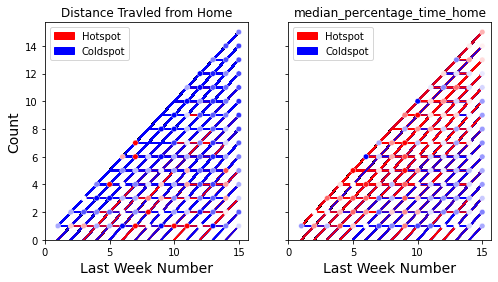

In [49]:
# from VASA.scatter import Scatter
sc = Scatter(v)
sc.plot(highlight = "06037", titles = ["Distance Travled from Home"])

In [50]:
from VASA.static_choropleth import StackedChoropleth

In [ ]:
import shapely
import libpysal as lps
from VASA.BasePlot import BasePlot
import math
import geopandas as gpd
import pandas as pd
from matplotlib import colors
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
from matplotlib.colors import ListedColormap


class StackedChoropleth(BasePlot):

    def __init__(self, v, main_folder: str, desc="", titles='', plot_dim=None, fips_order=None):

        cols = v.cols

        if not isinstance(titles, list):
            titles = [titles]

        if not plot_dim:
            tot = len(cols)
            if tot > 1:
                plot_dim = (2, math.ceil(tot / 2))
            if tot == 1:
                plot_dim = (1, 1)

        self._gpd_maps = [v.gdf]
        self._cols = cols
        self.v = v
        self._plot_dim = plot_dim
        self._desc = desc if desc else "-".join(cols)
        self._titles = titles if titles else cols

        self._fips_order = v.fips_order

        self.count_subfolder = f'{main_folder}/count/'
        self.recent_subfolder = f'{main_folder}/recent/'
        self.both_subfolder = f'{main_folder}/combined/'

        super(StackedChoropleth, self).__init__(main_folder, titles)

        self._count_labels = ["Low Count", "High Count"]
        self._recent_labels = ["1/1/2020", "12/31/2020"]
        self._count_title = "Number of Weeks"
        self._recent_title = "Recency"

        self._plot_title_size = 14
        self._font_size = 12

        self._figsize = (10, 8)
        # self._figsize = (1, 4)

    #
    #   MAPPING OPTIONS
    #

    def plot_count(self):
        if '_collapse_count_hot' not in locals():
            self.__collapse_count()

        self.__create_choropleth(
            self._collapse_count_hot,
            self._collapse_count_cold,
            typ=self._count_title,
            labels=self._count_labels,  # Start date to End Date
            figsize=self._figsize,
            output_folder=self.count_subfolder
        )

    def plot_recent(self):
        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        self.__create_choropleth(
            self._collapse_recent_hot,
            self._collapse_recent_cold,
            typ=self._recent_title,
            labels=self._recent_labels,  # maybe actual values?
            figsize=self._figsize,
            output_folder=self.recent_subfolder
        )

    def plot_both(self, a: int = 2500, b: int = 275):
        """
        RECO map showing both number of items the geometry was a significant
        hot or cold spot (count) and the last time it was a significant
        value (recency).

        Parameters
        ----------
        a: float
            Circle marker size intercept parameter. Circle marker size is
            determined by the equation: a + b * (count).
        b: float
            Circle marker size scale parameter. Circle marker size is
            determined by the equation: a + b * (count).
        """
        if '_collapse_count_combined' not in locals():
            self.__collapse_count_combined()

        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        hots = self._collapse_recent_hot
        colds = self._collapse_recent_cold

        fig, axes = plt.subplots(
            self._plot_dim[0],
            self._plot_dim[1],
            figsize=self._figsize,
            squeeze=False
        )
        fig.tight_layout()
        axes = axes.ravel()
        # plt.subplots_adjust(hspace=0.1)

        utility = PlotUtility(fig, self.both_subfolder)
        plt.subplots_adjust(hspace=0)

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):

                map_copy = gpd_map.copy()

                map_copy["geometry"] = [
                    # col.centroid.buffer(100 + 200/4 * count)
                    col.centroid.buffer(a + b * count)
                    # col.centroid.buffer(10000 + 11000/40 * count)
                    for col, count in zip(map_copy['geometry'], self._collapse_count_combined[col])
                ]
                # Row wise:
                ax = axes[map_idx + j]

                # if True: #self._region and self._region[map_idx] == "usa":
                #     ax.set_xlim([-0.235e7, 0.22e7])
                #     ax.set_ylim([-1.75e6, 1.45e6])
                # elif self._region[map_idx] == "ca":
                #     ax.set_xlim([-2.60e6, -1.563e6])
                #     ax.set_ylim([-1e6, 0.65e6])
                # elif self._region[map_idx] == "fl":
                #     ax.set_xlim([0.730e6, 1.570e6])
                #     ax.set_ylim([-1.700e6, -0.950e6])
                # elif self._region[map_idx] == "ny":
                #     ax.set_xlim([1.1e6, 2.0e6])
                #     ax.set_ylim([.03e6, 0.9e6])
                # elif self._region[map_idx] == "tx":
                #     ax.set_xlim([-0.990e6, 0.24e6])
                #     ax.set_ylim([-1.75e6, -0.380e6])

                # if adding new state start with looking at state bounds:
                # print(gpd_map.total_bounds)

                norm = colors.Normalize(
                    vmin=1, vmax=max([*hots[col], *colds[col]]))

                if len(self._titles) > 1:
                    ax.set_title(
                        self._titles[map_idx + j], fontsize=self._plot_title_size)
                super().hide_axis(ax)

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax, gpd_map)
                self.__create_choropleth_map(
                    hots[col], ax, map_copy, palette=self.__get_pallete("Reds"), norm=norm, edgecolor='white')
                self.__create_choropleth_map(
                    colds[col], ax, map_copy, palette=self.__get_pallete("Blues"), norm=norm, edgecolor='white')

        if len(self._titles) == 1:
            fig.suptitle(self._titles[0], fontsize=self._plot_title_size)

        self.__create_choropleth_legend_horiz(
            fig, self._recent_title, self._recent_labels)
        self.__create_choropleth_legend_circles(fig, self._count_labels)
        super().save_plot(self._desc, 'combined')

    def plot_bivar(self):
        """
        RECO map showing both number of items the geometry was a significant
        hot or cold spot (count) and the last time it was a significant
        value (recency).

        Parameters
        ----------
        a: float
            Circle marker size intercept parameter. Circle marker size is
            determined by the equation: a + b * (count).
        b: float
            Circle marker size scale parameter. Circle marker size is
            determined by the equation: a + b * (count).
        """
        if '_collapse_count_combined' not in locals():
            self.__collapse_count_combined()

        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        hots = self._collapse_recent_hot
        colds = self._collapse_recent_cold

        fig, axes = plt.subplots(
            self._plot_dim[0],
            self._plot_dim[1],
            figsize=self._figsize,
            squeeze=False
        )
        axes = axes.ravel()
        fig.tight_layout()
        # plt.subplots_adjust(hspace=0.1)

        utility = PlotUtility(fig, self.both_subfolder)
        plt.subplots_adjust(hspace=0)

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):

                # Row wise:
                ax = axes[map_idx + j]

                # if True: #self._region and self._region[map_idx] == "usa":
                #     ax.set_xlim([-0.235e7, 0.22e7])
                #     ax.set_ylim([-1.75e6, 1.45e6])
                # elif self._region[map_idx] == "ca":
                #     ax.set_xlim([-2.60e6, -1.563e6])
                #     ax.set_ylim([-1e6, 0.65e6])
                # elif self._region[map_idx] == "fl":
                #     ax.set_xlim([0.730e6, 1.570e6])
                #     ax.set_ylim([-1.700e6, -0.950e6])
                # elif self._region[map_idx] == "ny":
                #     ax.set_xlim([1.1e6, 2.0e6])
                #     ax.set_ylim([.03e6, 0.9e6])
                # elif self._region[map_idx] == "tx":
                #     ax.set_xlim([-0.990e6, 0.24e6])
                #     ax.set_ylim([-1.75e6, -0.380e6])

                # if adding new state start with looking at state bounds:
                # print(gpd_map.total_bounds)

                # norm = colors.Normalize(
                #     vmin=1, vmax=max([*hots[col], *colds[col]]))

                if len(self._titles) > 1:
                    ax.set_title(
                        self._titles[map_idx + j], fontsize=self._plot_title_size)
                super().hide_axis(ax)

                classifications = []
                colors = []

                half = self.v.df.shape[0] / 2
                for hot_class, cold_class, count in zip(hots[col].values, colds[col].values, self._collapse_count_combined[col].values):
                    is_sig = hot_class > 0 or cold_class > 0
                    is_hot = hot_class > cold_class
                    is_cold = not is_hot
                    hot_recent = hot_class > half + 1
                    cold_recent = cold_class > half + 1
                    # top quadrant
                    if not is_sig:
                        classifications.append(0)
                        # colors.append("white")
                    elif count > half:
                        if is_hot and hot_recent:
                            classifications.append(5)
                            # colors.append("red")
                        elif is_cold and cold_recent:
                            classifications.append(6)
                            # colors.append("purple")
                        else:
                            classifications.append(0)
                            # colors.append("white")
                    else:
                        if is_hot:
                            if hot_recent:
                                classifications.append(3)
                                # colors.append("yellow")
                            else:
                                classifications.append(1)
                                # colors.append("orange")
                        elif is_cold:
                            if cold_recent:
                                classifications.append(4)
                                # colors.append("blue")
                            else:
                                classifications.append(2)
                                # colors.append("green")
                        else:
                            classifications.append(0)
                            # colors.append("white")

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax, gpd_map)
                self.__create_choropleth_map(
                    classifications, ax, gpd_map, cmap=ListedColormap(["white", "orange", "green", "yellow", "blue", "red", "purple"]), edgecolor='white')

        if len(self._titles) == 1:
            fig.suptitle(self._titles[0], fontsize=self._plot_title_size)

        self.__create_bivar_legend(
            fig, "Hot Spots", self._recent_labels, [
                'white', "red", "orange", "yellow"], "left"
        )
        self.__create_bivar_legend(
            fig, "Cold Spots", self._recent_labels, [
                'white', 'purple', "blue", 'green'], "right"
        )
        super().save_plot(self._desc, 'bivar')

    #
    #   MAP FEATURES
    #
    def __create_bivar_legend(self, fig, title, labels, colors, position):
        start_x = 0.12
        start_y = -0.07  # 0 for non tight

        if position == "left":
            newa = fig.add_axes([start_x, start_y, 0.3, 0.15])
        elif position == "right":
            newa = fig.add_axes([start_x + 0.5, start_y, 0.3, 0.15])

        vals = np.arange(4).reshape(2, 2)
        cb = newa.imshow(vals, cmap=ListedColormap(colors))
        newa.xaxis.set_ticks([0, 1])
        newa.yaxis.set_ticks([0, 1])
        newa.set_xticklabels(["Past", "Recent"])
        newa.set_yticklabels(["High", "Low"])
        newa.set_xlabel("Recency", fontsize=self._font_size)
        newa.set_ylabel("Count", fontsize=self._font_size)
        newa.set_title(title, fontsize=self._font_size)

    def __create_choropleth(self, hots, colds, typ, labels, figsize, output_folder):
        fig, axes = plt.subplots(
            self._plot_dim[0],
            self._plot_dim[1],
            figsize=figsize,
            squeeze=False
        )
        axes = axes.ravel()
        fig.tight_layout()
        utility = PlotUtility(fig, output_folder)
        plt.subplots_adjust(hspace=0)

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):
                # Row wise:
                ax = axes[map_idx + j]

                norm = colors.Normalize(
                    vmin=0.5, vmax=max([*hots[col], *colds[col]]))
                ax.set_title(self._titles[map_idx + j],
                             fontsize=self._plot_title_size)
                ax.set_axis_off()

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax, gpd_map)
                self.__create_choropleth_map(
                    hots[col], ax, gpd_map, palette=self.__get_pallete("Reds"), norm=norm, edgecolor='black')
                self.__create_choropleth_map(
                    colds[col], ax, gpd_map, palette=self.__get_pallete("Blues"), norm=norm, edgecolor='black')

        self.__create_choropleth_legend_horiz(fig, typ, labels)

        super().save_plot(self._desc, typ)
        return fig, axes

    def __create_choropleth_map(self, data, ax, gpd_map, **kwargs):
        gpd_map \
            .assign(cl=data) \
            .plot(column='cl', k=2, ax=ax, linewidth=0, **kwargs)\


    def __create_choropleth_legend_horiz(self, fig, typ, labels):
        #
        #   THIS NEEDS TO BE LOOKED INTO
        #
        start_x = 0.12
        start_y = -0.07  # 0 for non tight

        newa = fig.add_axes([start_x, start_y + 0.04, 0.3, 0.03])
        sm = plt.cm.ScalarMappable(cmap="Reds")
        cb = plt.colorbar(sm, cax=newa, ticks=[], orientation="horizontal")
        cb.ax.tick_params(size=0)
        cb.ax.set_xlabel(typ, fontsize=self._font_size)
        cb.ax.xaxis.set_label_position("top")
        cb.ax.set_ylabel("Hot Spots", rotation=0, labelpad=35,
                         y=0.125, fontsize=self._font_size)

        newa = fig.add_axes([start_x, start_y + 0, 0.3, 0.03])
        sm = plt.cm.ScalarMappable(cmap="Blues")
        cb = plt.colorbar(sm, cax=newa, ticks=[
            0.1, 0.875], orientation="horizontal")
        cb.ax.set_xticklabels(labels, fontsize=self._font_size)
        cb.ax.tick_params(size=0)
        cb.ax.set_ylabel("Cold Spots", rotation=0, labelpad=35,
                         y=0.125, fontsize=self._font_size)

    def __create_choropleth_legend_vert(self, fig, typ, labels):
        #
        #   THIS NEEDS TO BE ADDED
        #
        return 1

    def __create_choropleth_legend_circles(self, fig, labels):
        start_y = -0.06  # 0 for non tight
        start_x = .58  # 0.5 for non tight

        if self._plot_dim[0] == 1 and self._plot_dim[1] == 1:
            def point_scale(i): return (15000 + 55000/40 * i) / 2500
        else:
            def point_scale(i): return (10000 + 11000/40 * i) / 2500

        newa = fig.add_axes([start_x, start_y + 0.07, 0.3, 0.03])
        points = [1, 5, 10, 20, 52]
        point_lgd = [plt.scatter([], [], s=point_scale(
            i), marker='o', color='k') for i in points]
        newa.legend(point_lgd, points, frameon=False,
                    title=self._count_title, ncol=5, handlelength=0.1)
        newa.set_axis_off()

    #
    #   UTILITY MAPPING FUNCTIONS
    #

    def __show_country_outline(self, ax, gpd_map):
        gpd_map \
            .assign(dissolve=0) \
            .dissolve(by="dissolve") \
            .plot(color="#FFFFFF00", ax=ax, edgecolor='black', linewidth=3)

    def __show_state_outline(self, ax, gpd_map):
        gpd_map["outline"] = [
            self.v.group_summary(v) for v in self._fips_order
        ]
        gpd_map \
            .dissolve(by="outline") \
            .plot(color="#FFFFFF00", ax=ax, edgecolor='black', linewidth=1)

    def __get_pallete(self, which):
        import copy

        palette = copy.copy(plt.get_cmap(which))
        palette.set_under("#FFFFFF00", 0)
        return palette

    #
    #   CALCULATIONS:
    #
    def __collapse_count_combined(self):
        self._collapse_count_combined = self.v.reduce('count_combined')

    def __collapse_count(self):
        self._collapse_count_hot = self.v.reduce("count_hh")
        self._collapse_count_cold = self.v.reduce("count_ll")

    def __collapse_recent(self):
        self._collapse_recent_hot = self.v.reduce("recency_hh")
        self._collapse_recent_cold = self.v.reduce("recency_ll")

    def __filter_state(self, map_data, arr):

        if self._fips_order is None:
            return arr

        data = pd.DataFrame()
        data["fips"] = self._fips_order
        data["val"] = arr

        return map_data.merge(data, how="left", on="fips")["val"]

    #
    #
    #   ALTERNATIVE MAPS
    #
    #

    def __create_scatter(self, ax, xs, ys):
        ax.scatter(xs, ys, c="blue", alpha=0.3)
        ax.plot(range(0, max(xs) + 1), range(0, max(xs) + 1))

    # def scatter(self):
    #     if '_collapse_count_combined' not in locals():
    #         self.__collapse_count_combined()

    #     if '_collapse_recent_hot' not in locals():
    #         self.__collapse_recent()

    #     fig, axes = plt.subplots(
    #         self._plot_dim[0],
    #         self._plot_dim[1],
    #         figsize=self._figsize
    #     )
    #     fig.tight_layout()
    #     utility = PlotUtility(fig, self.scatter_subfolder)

    #     # Since I'm restricting maps OR col to be a single item this is really a single loop:
    #     for map_idx, gpd_map in enumerate(self._gpd_maps):

    #         for j, col in enumerate(self._cols):
    #             # Row wise:

    #             ys = self._collapse_count_combined[map_idx + j]
    #             xs = [(a if a > b else b) for a, b in zip(
    #                 self._collapse_recent_hot[map_idx + j], self._collapse_recent_cold[map_idx + j])]

    #             ax.set_title(self._titles[map_idx + j],
    #                          fontsize=self._plot_title_size)
    #             self.__create_scatter(ax, xs, ys)

    #     super().save_plot(self._desc)

    def separate_hot_cold(self):
        if '_collapse_count_hot' not in locals():
            self.__collapse_count()

        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        fig, axes = plt.subplots(
            self._plot_dim[0] * self._plot_dim[1],
            2,
            figsize=self._figsize,
            squeeze=False
        )
        axes = axes.ravel()
        fig.tight_layout()
        utility = PlotUtility(fig, self.scatter_subfolder)
        plt.subplots_adjust(hspace=0)

        hots = self._collapse_count_hot
        colds = self._collapse_count_cold

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):
                # Row wise:
                ax_hot = axes[map_idx + j]
                ax_cold = axes[map_idx + j + 1]

                norm = colors.Normalize(vmin=0.5, vmax=max(
                    [*hots[map_idx + j], *colds[map_idx + j]]))
                ax_hot.set_title(
                    self._titles[map_idx + j], fontsize=self._plot_title_size)
                ax_cold.set_title(
                    self._titles[map_idx + j], fontsize=self._plot_title_size)
                ax_hot.set_axis_off()
                ax_cold.set_axis_off()

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax_hot, gpd_map)
                self.__show_state_outline(ax_cold, gpd_map)
                self.__create_choropleth_map(
                    hots[map_idx + j], ax_hot, gpd_map, palette=self.__get_pallete("Reds"), norm=norm, edgecolor='black')
                self.__create_choropleth_map(
                    colds[map_idx + j], ax_cold, gpd_map, palette=self.__get_pallete("Blues"), norm=norm, edgecolor='black')

        super().save_plot(self._desc, "separate")

    def hot_cold(self):
        """
        hot_cold 


        THIS SHOULD BE INSTEAD OF BIVAR

        """
        if '_collapse_count_hot' not in locals():
            self.__collapse_count()

        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        fig, axes = plt.subplots(
            self._plot_dim[0],
            self._plot_dim[1],
            figsize=self._figsize,
            squeeze=False
        )
        axes = axes.ravel()
        fig.tight_layout()
        utility = PlotUtility(fig, self.scatter_subfolder)
        plt.subplots_adjust(hspace=0)

        hots = self._collapse_count_hot
        colds = self._collapse_count_cold

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):
                # Row wise:

                ax = axes[map_idx + j]

                norm = colors.Normalize(vmin=0.5, vmax=max(
                    [*hots[map_idx + j], *colds[map_idx + j]]))
                ax.set_title(self._titles[map_idx + j],
                             fontsize=self._plot_title_size)
                ax.set_axis_off()

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax, gpd_map)
                self.__create_choropleth_map(
                    hots[map_idx + j], ax, gpd_map, palette=self.__get_pallete("Reds"), norm=norm, edgecolor='black')
                self.__create_choropleth_map(
                    colds[map_idx + j], ax, gpd_map, palette=self.__get_pallete("Blues"), norm=norm, edgecolor='black')

        super().save_plot(self._desc, "bivar")


NameError: name 'PlotUtility' is not defined

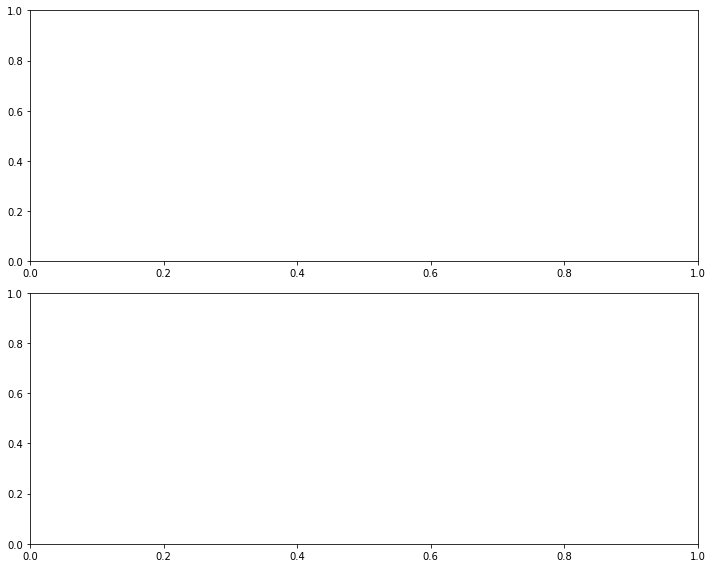

In [51]:
stcked = StackedChoropleth(v, os.getcwd())
stcked.plot_count()

![](count/distance_traveled_from_home.png)

In [14]:
stcked = StackedChoropleth(v, os.getcwd())
stcked.plot_recent()

![](recent/distance_traveled_from_home.png)

In [136]:
centroids = v.gdf.geometry.centroid
x, y = centroids.x, centroids.y

x_min, x_max = x.min() - 0.5, x.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5

h = 10000
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

v.gdf["classification"] = np.random.randint(1, 3, size=v.gdf.shape[0])
vals = []
# pts = np.array([(x, y) for x, y in zip(xx.ravel(), yy.ravel())])

for i, (x, y) in enumerate(zip(xx.ravel(), yy.ravel())):
    print(f"\r{i}, {xx.shape[0] * xx.shape[1]}", end="")
    pt = shapely.geometry.Point(x, y)
    cnts = v.gdf.geometry.contains(pt)
    
    if np.any(cnts):
        vals.append(v.gdf[cnts].iloc[0].classification)
    else:
        vals.append(0)

Z = np.reshape(vals, xx.shape)

3073, 3074

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.contourf(xx, yy, Z)
v.gdf.plot(ax=ax, color="#ffffff00", edgecolor="black", linewidth=1/10)

In [ ]:
stcked = StackedChoropleth(v, os.getcwd())
stcked.plot_both()

![](combined/distance_traveled_from_home1.png)

In [47]:
import matplotlib.pyplot as plt
import os
from typing import List


class BasePlot:
    """
    The BasePlot class. This is what it does. Test.
    """

    def __init__(
        self,
        folder: str,
        titles: str or List[str],
        file_ext: str = "png",
        dpi: int = 150
    ) -> None:
        self.folder = folder
        self.titles = titles
        self.file_ext = file_ext
        self.dpi = dpi

        if not os.path.exists(f"{folder}/"):
            os.makedirs(f"{folder}/")

    def save_plot(self, name: str, subfolder: str = ""):
        """
        save_plot This is the save_plot function

        Args:
            name (str): [description]
            subfolder (str, optional): [description]. Defaults to "".
        """
        # self._fig.set_facecolor("w")

        output = f"{self.folder + ('/' if subfolder else '') + subfolder}/"
        if not os.path.exists(f"{output}/"):
            os.makedirs(f"{output}/")

        file_name = f"{output}/{name}.{self.file_ext}"

        i = 0
        while os.path.isfile(file_name):
            i += 1
            file_name = f"{output}/{name}{i}.{self.file_ext}"

        plt.savefig(
            file_name,
            bbox_inches='tight',
            dpi=self.dpi
        )

    def hide_axis(self, ax):
        """
        hide_axis This is the hide_axis function

        Args:
            ax ([type]): [description]
        """
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)


In [78]:
import shapely
import libpysal as lps
from VASA.BasePlot import BasePlot
import math
import geopandas as gpd
import pandas as pd
from matplotlib import colors
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
from matplotlib.colors import ListedColormap


class StackedChoropleth(BasePlot):

    def __init__(self, v, main_folder: str, desc="", titles=None, plot_dim=None, fips_order=None, figsize=(0, 0)):

        cols = v.cols

        if len(titles) == len(cols):
            if not isinstance(titles, list):
                titles = [titles]
        else:
            titles = cols

        if plot_dim == None:
            tot = len(cols)
            if tot > 1:
                plot_dim = (math.ceil(tot / 2), 2)
            if tot == 1:
                plot_dim = (1, 1)

        self._gpd_maps = [v.gdf]
        self._cols = cols
        self.v = v
        self._plot_dim = plot_dim
        self._desc = desc if desc else "-".join(cols)
        self._titles = titles

        self._fips_order = v.fips_order

        self.count_subfolder = f'{main_folder}/count/'
        self.recent_subfolder = f'{main_folder}/recent/'
        self.both_subfolder = f'{main_folder}/combined/'

        super(StackedChoropleth, self).__init__(main_folder, titles)

        self._count_labels = ["Low Count", "High Count"]
        self._recent_labels = ["1/1/2020", "12/31/2020"]
        self._count_title = "Number of Weeks"
        self._recent_title = "Recency"

        self._plot_title_size = 14
        self._font_size = 12

        n_cols = math.ceil(len(cols) / 2)
        n_rows = min(len(cols), 2)

        self._figsize = ((n_rows * 4, n_cols * 4)
                         if figsize[0] * figsize[1] <= 0 else figsize)
        # self._figsize = (1, 4)

    #
    #   MAPPING OPTIONS
    #

    def plot_count(self):
        if '_collapse_count_hot' not in locals():
            self.__collapse_count()

        self.__create_choropleth(
            self._collapse_count_hot,
            self._collapse_count_cold,
            typ=self._count_title,
            labels=self._count_labels,  # Start date to End Date
            figsize=self._figsize,
            output_folder=self.count_subfolder
        )

    def plot_recent(self):
        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        self.__create_choropleth(
            self._collapse_recent_hot,
            self._collapse_recent_cold,
            typ=self._recent_title,
            labels=self._recent_labels,  # maybe actual values?
            figsize=self._figsize,
            output_folder=self.recent_subfolder
        )

    def plot_both(self, a: int = 2500, b: int = 275):
        """
        RECO map showing both number of items the geometry was a significant
        hot or cold spot (count) and the last time it was a significant
        value (recency).

        Parameters
        ----------
        a: float
            Circle marker size intercept parameter. Circle marker size is
            determined by the equation: a + b * (count).
        b: float
            Circle marker size scale parameter. Circle marker size is
            determined by the equation: a + b * (count).
        """
        if '_collapse_count_combined' not in locals():
            self.__collapse_count_combined()

        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        hots = self._collapse_recent_hot
        colds = self._collapse_recent_cold
        print(self._plot_dim)
        print(self._figsize)
        fig, axes = plt.subplots(
            self._plot_dim[0],
            self._plot_dim[1],
            figsize=self._figsize,
            squeeze=False
        )
        fig.tight_layout()
        axes = axes.ravel()
        # plt.subplots_adjust(hspace=0.1)

        plt.subplots_adjust(hspace=0)

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):

                map_copy = gpd_map.copy()

                map_copy["geometry"] = [
                    # col.centroid.buffer(100 + 200/4 * count)
                    col.centroid.buffer(a + b * count)
                    # col.centroid.buffer(10000 + 11000/40 * count)
                    for col, count in zip(map_copy['geometry'], self._collapse_count_combined[col])
                ]
                # Row wise:
                ax = axes[map_idx + j]

                # if True: #self._region and self._region[map_idx] == "usa":
                #     ax.set_xlim([-0.235e7, 0.22e7])
                #     ax.set_ylim([-1.75e6, 1.45e6])
                # elif self._region[map_idx] == "ca":
                #     ax.set_xlim([-2.60e6, -1.563e6])
                #     ax.set_ylim([-1e6, 0.65e6])
                # elif self._region[map_idx] == "fl":
                #     ax.set_xlim([0.730e6, 1.570e6])
                #     ax.set_ylim([-1.700e6, -0.950e6])
                # elif self._region[map_idx] == "ny":
                #     ax.set_xlim([1.1e6, 2.0e6])
                #     ax.set_ylim([.03e6, 0.9e6])
                # elif self._region[map_idx] == "tx":
                #     ax.set_xlim([-0.990e6, 0.24e6])
                #     ax.set_ylim([-1.75e6, -0.380e6])

                # if adding new state start with looking at state bounds:
                # print(gpd_map.total_bounds)

                norm = colors.Normalize(
                    vmin=1, vmax=max([*hots[col], *colds[col]]))

                if len(self._titles) > 1:
                    ax.set_title(
                        self._titles[map_idx + j], fontsize=self._plot_title_size)
                super().hide_axis(ax)

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax, gpd_map)
                self.__create_choropleth_map(
                    hots[col], ax, map_copy, cmap=self.__get_pallete("Reds"), norm=norm, edgecolor='white')
                self.__create_choropleth_map(
                    colds[col], ax, map_copy, cmap=self.__get_pallete("Blues"), norm=norm, edgecolor='white')

        if len(self._titles) == 1:
            fig.suptitle(self._titles[0], fontsize=self._plot_title_size)

        self.__create_choropleth_legend_horiz(
            fig, self._recent_title, self._recent_labels)
        self.__create_choropleth_legend_circles(fig, self._count_labels)
        super().save_plot(self._desc, 'combined')

    def plot_bivar(self):
        """
        RECO map showing both number of items the geometry was a significant
        hot or cold spot (count) and the last time it was a significant
        value (recency).

        Parameters
        ----------
        a: float
            Circle marker size intercept parameter. Circle marker size is
            determined by the equation: a + b * (count).
        b: float
            Circle marker size scale parameter. Circle marker size is
            determined by the equation: a + b * (count).
        """
        if '_collapse_count_combined' not in locals():
            self.__collapse_count_combined()

        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        hots = self._collapse_recent_hot
        colds = self._collapse_recent_cold

        fig, axes = plt.subplots(
            self._plot_dim[0],
            self._plot_dim[1],
            figsize=self._figsize,
            squeeze=False
        )
        axes = axes.ravel()
        fig.tight_layout()
        # plt.subplots_adjust(hspace=0.1)

        plt.subplots_adjust(hspace=0)

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):

                # Row wise:
                ax = axes[map_idx + j]

                # if True: #self._region and self._region[map_idx] == "usa":
                #     ax.set_xlim([-0.235e7, 0.22e7])
                #     ax.set_ylim([-1.75e6, 1.45e6])
                # elif self._region[map_idx] == "ca":
                #     ax.set_xlim([-2.60e6, -1.563e6])
                #     ax.set_ylim([-1e6, 0.65e6])
                # elif self._region[map_idx] == "fl":
                #     ax.set_xlim([0.730e6, 1.570e6])
                #     ax.set_ylim([-1.700e6, -0.950e6])
                # elif self._region[map_idx] == "ny":
                #     ax.set_xlim([1.1e6, 2.0e6])
                #     ax.set_ylim([.03e6, 0.9e6])
                # elif self._region[map_idx] == "tx":
                #     ax.set_xlim([-0.990e6, 0.24e6])
                #     ax.set_ylim([-1.75e6, -0.380e6])

                # if adding new state start with looking at state bounds:
                # print(gpd_map.total_bounds)

                # norm = colors.Normalize(
                #     vmin=1, vmax=max([*hots[col], *colds[col]]))

                if len(self._titles) > 1:
                    ax.set_title(
                        self._titles[map_idx + j], fontsize=self._plot_title_size)
                super().hide_axis(ax)

                classifications = []
                colors = []

                half = self.v.df.shape[0] / 2
                for hot_class, cold_class, count in zip(hots[col].values, colds[col].values, self._collapse_count_combined[col].values):
                    is_sig = hot_class > 0 or cold_class > 0
                    is_hot = hot_class > cold_class
                    is_cold = not is_hot
                    hot_recent = hot_class > half + 1
                    cold_recent = cold_class > half + 1
                    # top quadrant
                    if not is_sig:
                        classifications.append(0)
                        # colors.append("white")
                    elif count > half:
                        if is_hot and hot_recent:
                            classifications.append(5)
                            # colors.append("red")
                        elif is_cold and cold_recent:
                            classifications.append(6)
                            # colors.append("purple")
                        else:
                            classifications.append(0)
                            # colors.append("white")
                    else:
                        if is_hot:
                            if hot_recent:
                                classifications.append(3)
                                # colors.append("yellow")
                            else:
                                classifications.append(1)
                                # colors.append("orange")
                        elif is_cold:
                            if cold_recent:
                                classifications.append(4)
                                # colors.append("blue")
                            else:
                                classifications.append(2)
                                # colors.append("green")
                        else:
                            classifications.append(0)
                            # colors.append("white")

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax, gpd_map)
                self.__create_choropleth_map(
                    classifications, ax, gpd_map, cmap=ListedColormap(["white", "orange", "green", "yellow", "blue", "red", "purple"]), edgecolor='white')

        if len(self._titles) == 1:
            fig.suptitle(self._titles[0], fontsize=self._plot_title_size)

        self.__create_bivar_legend(
            fig, "Hot Spots", self._recent_labels, [
                'white', "red", "orange", "yellow"], "left"
        )
        self.__create_bivar_legend(
            fig, "Cold Spots", self._recent_labels, [
                'white', 'purple', "blue", 'green'], "right"
        )
        super().save_plot(self._desc, 'bivar')

    #
    #   MAP FEATURES
    #
    def __create_bivar_legend(self, fig, title, labels, colors, position):
        start_x = 0.12
        start_y = -0.07  # 0 for non tight

        if position == "left":
            newa = fig.add_axes([start_x, start_y, 0.3, 0.15])
        elif position == "right":
            newa = fig.add_axes([start_x + 0.5, start_y, 0.3, 0.15])

        vals = np.arange(4).reshape(2, 2)
        cb = newa.imshow(vals, cmap=ListedColormap(colors))
        newa.xaxis.set_ticks([0, 1])
        newa.yaxis.set_ticks([0, 1])
        newa.set_xticklabels(["Past", "Recent"])
        newa.set_yticklabels(["High", "Low"])
        newa.set_xlabel("Recency", fontsize=self._font_size)
        newa.set_ylabel("Count", fontsize=self._font_size)
        newa.set_title(title, fontsize=self._font_size)

    def __create_choropleth(self, hots, colds, typ, labels, figsize, output_folder):
        fig, axes = plt.subplots(
            self._plot_dim[0],
            self._plot_dim[1],
            figsize=figsize,
            squeeze=False
        )
        axes = axes.ravel()
        fig.tight_layout()
        plt.subplots_adjust(hspace=0)

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):
                # Row wise:
                ax = axes[map_idx + j]

                norm = colors.Normalize(
                    vmin=0.5, vmax=max([*hots[col], *colds[col]]))
                ax.set_title(self._titles[map_idx + j],
                             fontsize=self._plot_title_size)
                ax.set_axis_off()

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax, gpd_map)
                self.__create_choropleth_map(
                    hots[col], ax, gpd_map, cmap=self.__get_pallete("Reds"), norm=norm, edgecolor='black')
                self.__create_choropleth_map(
                    colds[col], ax, gpd_map, cmap=self.__get_pallete("Blues"), norm=norm, edgecolor='black')

        self.__create_choropleth_legend_horiz(fig, typ, labels)

        super().save_plot(self._desc, typ)
        return fig, axes

    def __create_choropleth_map(self, data, ax, gpd_map, **kwargs):
        gpd_map \
            .assign(cl=data) \
            .plot(column='cl', k=2, ax=ax, linewidth=0, **kwargs)\


    def __create_choropleth_legend_horiz(self, fig, typ, labels):
        #
        #   THIS NEEDS TO BE LOOKED INTO
        #
        start_x = 0.12
        start_y = -0.07  # 0 for non tight

        newa = fig.add_axes([start_x, start_y + 0.04, 0.3, 0.03])
        sm = plt.cm.ScalarMappable(cmap="Reds")
        cb = plt.colorbar(sm, cax=newa, ticks=[], orientation="horizontal")
        cb.ax.tick_params(size=0)
        cb.ax.set_xlabel(typ, fontsize=self._font_size)
        cb.ax.xaxis.set_label_position("top")
        cb.ax.set_ylabel("Hot Spots", rotation=0, labelpad=35,
                         y=0.125, fontsize=self._font_size)

        newa = fig.add_axes([start_x, start_y + 0, 0.3, 0.03])
        sm = plt.cm.ScalarMappable(cmap="Blues")
        cb = plt.colorbar(sm, cax=newa, ticks=[
            0.1, 0.875], orientation="horizontal")
        cb.ax.set_xticklabels(labels, fontsize=self._font_size)
        cb.ax.tick_params(size=0)
        cb.ax.set_ylabel("Cold Spots", rotation=0, labelpad=35,
                         y=0.125, fontsize=self._font_size)

    def __create_choropleth_legend_vert(self, fig, typ, labels):
        #
        #   THIS NEEDS TO BE ADDED
        #
        return 1

    def __create_choropleth_legend_circles(self, fig, labels):
        start_y = -0.06  # 0 for non tight
        start_x = .58  # 0.5 for non tight

        if self._plot_dim[0] == 1 and self._plot_dim[1] == 1:
            def point_scale(i): return (15000 + 55000/40 * i) / 2500
        else:
            def point_scale(i): return (10000 + 11000/40 * i) / 2500

        newa = fig.add_axes([start_x, start_y + 0.07, 0.3, 0.03])
        points = [1, 5, 10, 20, 52]
        point_lgd = [plt.scatter([], [], s=point_scale(
            i), marker='o', color='k') for i in points]
        newa.legend(point_lgd, points, frameon=False,
                    title=self._count_title, ncol=5, handlelength=0.1)
        newa.set_axis_off()

    #
    #   UTILITY MAPPING FUNCTIONS
    #

    def __show_country_outline(self, ax, gpd_map):
        gpd_map \
            .assign(dissolve=0) \
            .dissolve(by="dissolve") \
            .plot(color="#FFFFFF00", ax=ax, edgecolor='black', linewidth=3)

    def __show_state_outline(self, ax, gpd_map):
        gpd_map["outline"] = [
            self.v.group_summary(v) for v in self._fips_order
        ]
        gpd_map \
            .dissolve(by="outline") \
            .plot(color="#FFFFFF00", ax=ax, edgecolor='black', linewidth=1)

    def __get_pallete(self, which):
        import copy

        palette = copy.copy(plt.get_cmap(which))
        palette.set_under("#FFFFFF00", 0)
        return palette

    #
    #   CALCULATIONS:
    #
    def __collapse_count_combined(self):
        self._collapse_count_combined = self.v.reduce('count_combined')

    def __collapse_count(self):
        self._collapse_count_hot = self.v.reduce("count_hh")
        self._collapse_count_cold = self.v.reduce("count_ll")

    def __collapse_recent(self):
        self._collapse_recent_hot = self.v.reduce("recency_hh")
        self._collapse_recent_cold = self.v.reduce("recency_ll")

    def __filter_state(self, map_data, arr):

        if self._fips_order is None:
            return arr

        data = pd.DataFrame()
        data["fips"] = self._fips_order
        data["val"] = arr

        return map_data.merge(data, how="left", on="fips")["val"]

    #
    #
    #   ALTERNATIVE MAPS
    #
    #

    def __create_scatter(self, ax, xs, ys):
        ax.scatter(xs, ys, c="blue", alpha=0.3)
        ax.plot(range(0, max(xs) + 1), range(0, max(xs) + 1))

    # def scatter(self):
    #     if '_collapse_count_combined' not in locals():
    #         self.__collapse_count_combined()

    #     if '_collapse_recent_hot' not in locals():
    #         self.__collapse_recent()

    #     fig, axes = plt.subplots(
    #         self._plot_dim[0],
    #         self._plot_dim[1],
    #         figsize=self._figsize
    #     )
    #     fig.tight_layout()
    #     utility = PlotUtility(fig, self.scatter_subfolder)

    #     # Since I'm restricting maps OR col to be a single item this is really a single loop:
    #     for map_idx, gpd_map in enumerate(self._gpd_maps):

    #         for j, col in enumerate(self._cols):
    #             # Row wise:

    #             ys = self._collapse_count_combined[map_idx + j]
    #             xs = [(a if a > b else b) for a, b in zip(
    #                 self._collapse_recent_hot[map_idx + j], self._collapse_recent_cold[map_idx + j])]

    #             ax.set_title(self._titles[map_idx + j],
    #                          fontsize=self._plot_title_size)
    #             self.__create_scatter(ax, xs, ys)

    #     super().save_plot(self._desc)

    def separate_hot_cold(self):
        if '_collapse_count_hot' not in locals():
            self.__collapse_count()

        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        fig, axes = plt.subplots(
            self._plot_dim[0] * self._plot_dim[1],
            2,
            figsize=self._figsize,
            squeeze=False
        )
        axes = axes.ravel()
        fig.tight_layout()
        plt.subplots_adjust(hspace=0)

        hots = self._collapse_count_hot
        colds = self._collapse_count_cold

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):
                # Row wise:
                ax_hot = axes[map_idx + j]
                ax_cold = axes[map_idx + j + 1]

                norm = colors.Normalize(vmin=0.5, vmax=max(
                    [*hots[map_idx + j], *colds[map_idx + j]]))
                ax_hot.set_title(
                    self._titles[map_idx + j], fontsize=self._plot_title_size)
                ax_cold.set_title(
                    self._titles[map_idx + j], fontsize=self._plot_title_size)
                ax_hot.set_axis_off()
                ax_cold.set_axis_off()

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax_hot, gpd_map)
                self.__show_state_outline(ax_cold, gpd_map)
                self.__create_choropleth_map(
                    hots[map_idx + j], ax_hot, gpd_map, cmap=self.__get_pallete("Reds"), norm=norm, edgecolor='black')
                self.__create_choropleth_map(
                    colds[map_idx + j], ax_cold, gpd_map, cmap=self.__get_pallete("Blues"), norm=norm, edgecolor='black')

        super().save_plot(self._desc, "separate")

    def hot_cold(self):
        """
        hot_cold 


        THIS SHOULD BE INSTEAD OF BIVAR

        """
        if '_collapse_count_hot' not in locals():
            self.__collapse_count()

        if '_collapse_recent_hot' not in locals():
            self.__collapse_recent()

        fig, axes = plt.subplots(
            self._plot_dim[0],
            self._plot_dim[1],
            figsize=self._figsize,
            squeeze=False
        )
        axes = axes.ravel()
        fig.tight_layout()
        plt.subplots_adjust(hspace=0)

        hots = self._collapse_count_hot
        colds = self._collapse_count_cold

        # Since I'm restricting maps OR col to be a single item this is really a single loop:
        for map_idx, gpd_map in enumerate(self._gpd_maps):

            for j, col in enumerate(self._cols):
                # Row wise:

                ax = axes[map_idx + j]

                norm = colors.Normalize(vmin=0.5, vmax=max(
                    [*hots[map_idx + j], *colds[map_idx + j]]))
                ax.set_title(self._titles[map_idx + j],
                             fontsize=self._plot_title_size)
                ax.set_axis_off()

                # self.__show_country_outline(ax, gpd_map)
                self.__show_state_outline(ax, gpd_map)
                self.__create_choropleth_map(
                    hots[map_idx + j], ax, gpd_map, cmap=self.__get_pallete("Reds"), norm=norm, edgecolor='black')
                self.__create_choropleth_map(
                    colds[map_idx + j], ax, gpd_map, cmap=self.__get_pallete("Blues"), norm=norm, edgecolor='black')

        super().save_plot(self._desc, "bivar")


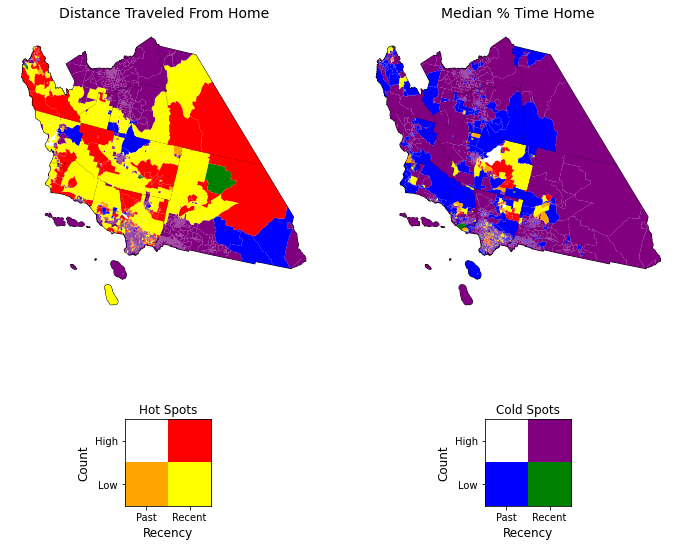

In [62]:
stcked = StackedChoropleth(v, os.getcwd(), titles=["Distance Traveled From Home", "Median % Time Home"])
stcked.plot_bivar()

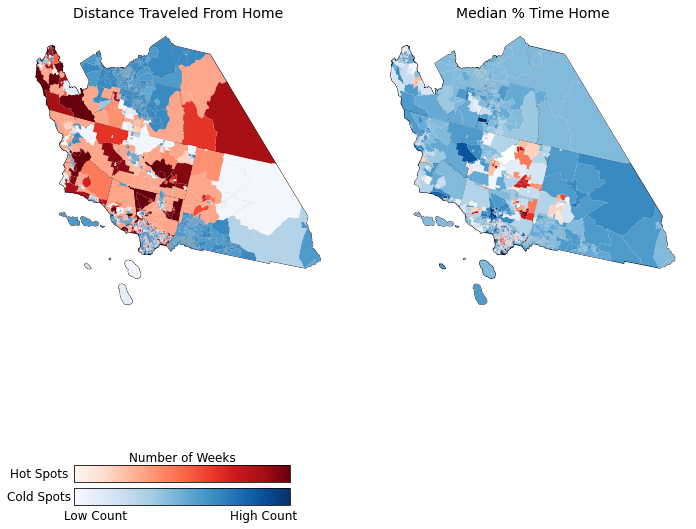

In [65]:
stcked = StackedChoropleth(v, os.getcwd(), titles=["Distance Traveled From Home", "Median % Time Home"], figsize=(16, 8))
stcked.plot_count()

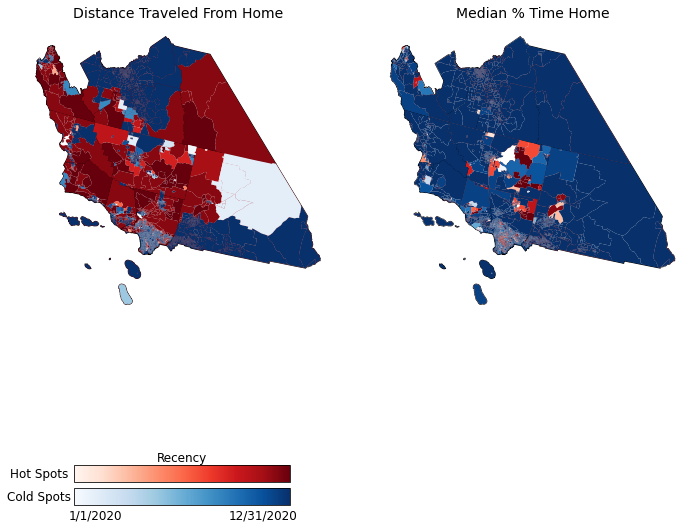

In [66]:
stcked.plot_recent()

(1, 2)
(8, 4)


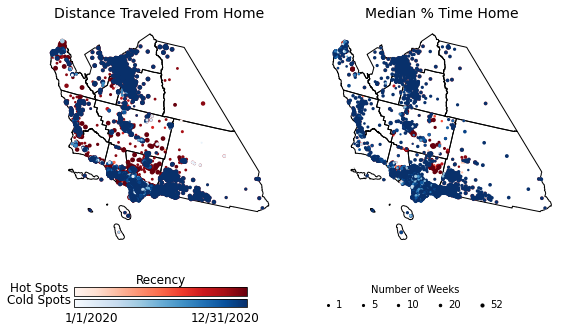

In [79]:
stcked = StackedChoropleth(v, os.getcwd(), titles=["Distance Traveled From Home", "Median % Time Home"])
stcked.plot_both()

![](combined/distance_traveled_from_home.png)